![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Bike store sales

In this class we'll be analyzing sales made on bike stores.

[Follow this data in a Google Spreadsheet](https://docs.google.com/spreadsheets/d/1NOe_UrPx6ULF2C5MvHmZ9ODuw8t9M77Q1Y64gP-7JHA/edit?usp=sharing)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Loading our data:

In [ ]:
sales = pd.read_csv(
    'data/sales_data.csv',
    parse_dates=['Date'])

In [ ]:
!head data/sales_data.csv

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## The data at a glance:

In [ ]:
sales.head(10)
# sales.info()

In [ ]:
sales.shape

In [ ]:
sales.info()

In [ ]:
sales.describe()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Numerical analysis and visualization

We'll analyze the `Unit_Cost` column:

In [ ]:
sales['Unit_Cost'].describe()

In [ ]:
sales['Unit_Cost'].mean()

In [ ]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

In [ ]:
sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kde

In [ ]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(sales['Unit_Cost'].mean(), color='red')
ax.axvline(sales['Unit_Cost'].median(), color='green')

In [ ]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Categorical analysis and visualization

We'll analyze the `Age_Group` column:

In [ ]:
sales.head()

In [ ]:
# sales['Age_Group'].value_counts().plot(kind='bar', figsize=(4,4))
sales['Age_Group'].value_counts().plot(kind='bar', figsize=(4,4))

In [ ]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

In [ ]:
ax = sales['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Relationship between the columns?

Can we find any significant relationship?

In [17]:
corr = sales.corr()

corr

C:\Users\sanga\AppData\Local\Temp\ipykernel_18064\2236959692.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sales.corr()


,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue/Age
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853,0.070964
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673,-0.021308
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326,-0.211442
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895,0.923957
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865,NaN
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522,NaN
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572,0.932174
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758,0.923957
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000,0.932427
Revenue/Age,0.070964,-0.021308,-0.211442,0.923957,NaN,NaN,0.932174,0.923957,0.932427,1.000000


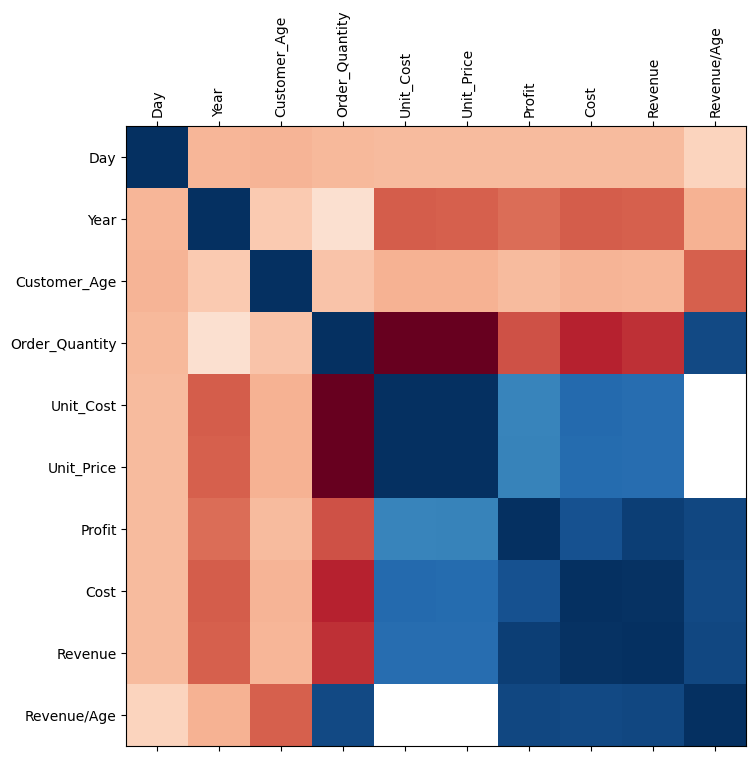

In [18]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

<AxesSubplot: xlabel='Customer_Age', ylabel='Revenue'>

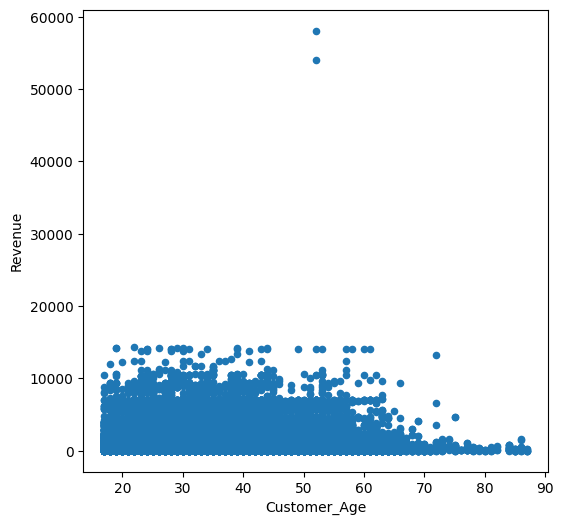

In [19]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

In [ ]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

In [ ]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Profit')

Year                 AxesSubplot(0.125,0.53;0.227941x0.35)
Customer_Age      AxesSubplot(0.398529,0.53;0.227941x0.35)
Order_Quantity    AxesSubplot(0.672059,0.53;0.227941x0.35)
Unit_Cost            AxesSubplot(0.125,0.11;0.227941x0.35)
Unit_Price        AxesSubplot(0.398529,0.11;0.227941x0.35)
Profit            AxesSubplot(0.672059,0.11;0.227941x0.35)
dtype: object

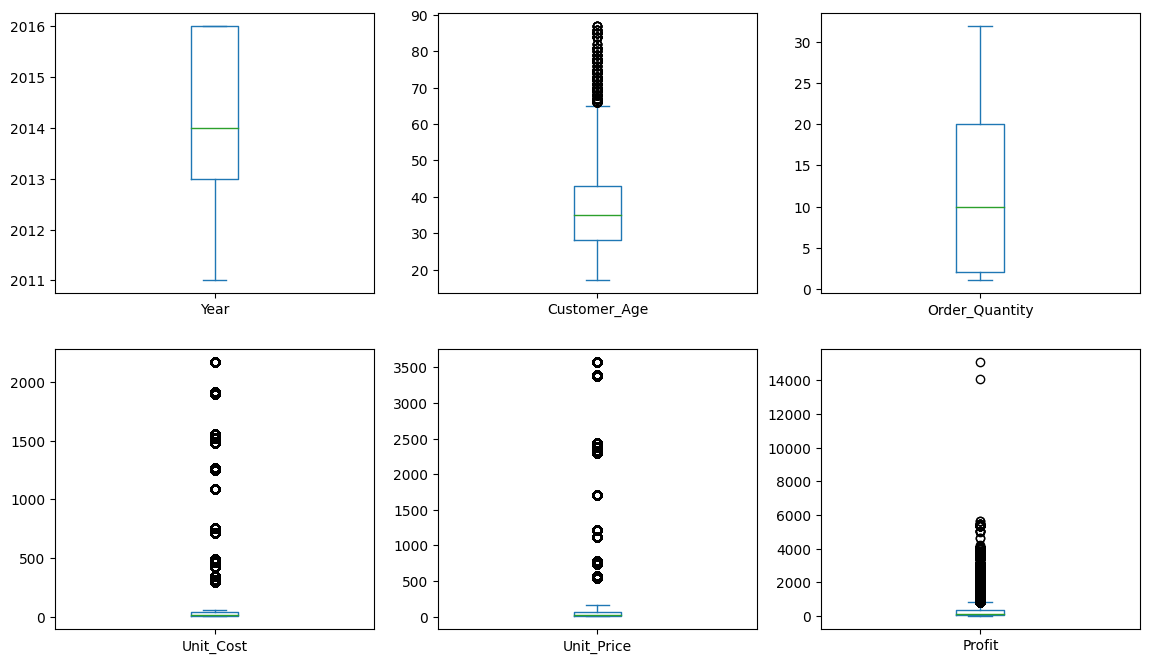

In [20]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Column wrangling

We can also create new columns or modify existing ones.

### Add and calculate a new `Revenue_per_Age` column

In [21]:
sales['Revenue_per_Age'] = sales['Revenue'] / sales['Customer_Age']

sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

In [ ]:
sales['Revenue_per_Age'].plot(kind='density', figsize=(14,6))

<AxesSubplot: ylabel='Frequency'>

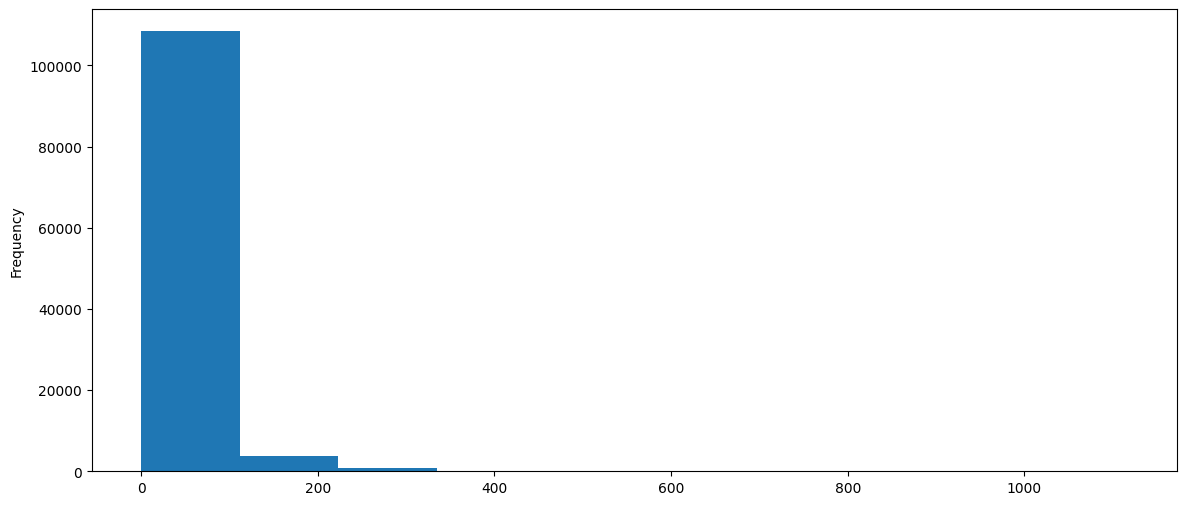

In [22]:
sales['Revenue_per_Age'].plot(kind='hist', figsize=(14,6))

### Add and calculate a new `Calculated_Cost` column

Use this formula

$$ Calculated\_Cost = Order\_Quantity * Unit\_Cost $$

In [23]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']

sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [ ]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

We can see the relationship between `Cost` and `Profit` using a scatter plot:

In [ ]:
sales.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(6,6))

### Add and calculate a new `Calculated_Revenue` column

Use this formula

$$ Calculated\_Revenue = Cost + Profit $$

In [ ]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']

sales['Calculated_Revenue'].head()

In [ ]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

In [ ]:
sales.head()

<AxesSubplot: ylabel='Frequency'>

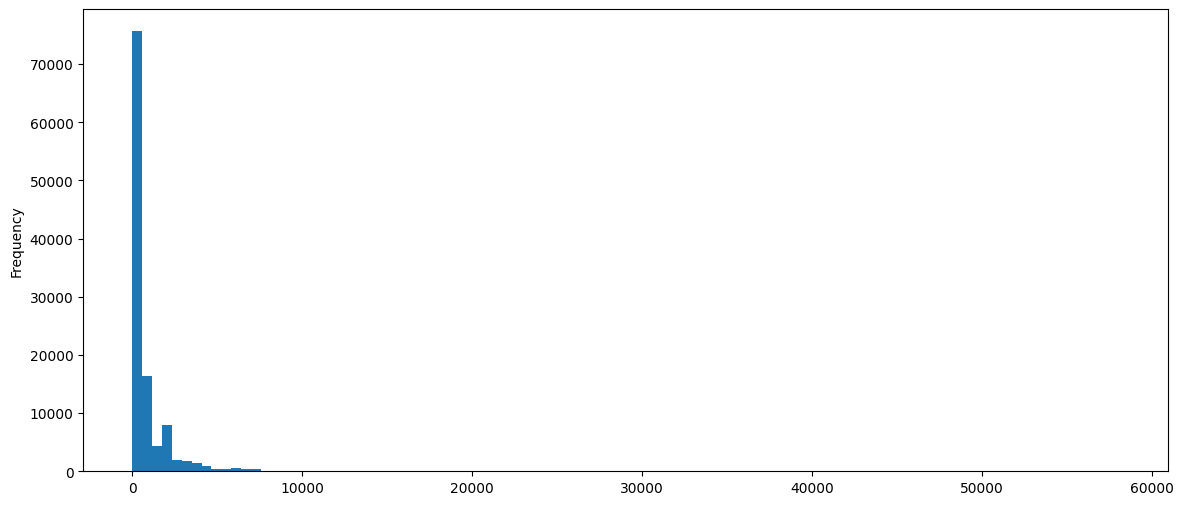

In [24]:
sales['Revenue'].plot(kind='hist', bins=100, figsize=(14,6))

### Modify all `Unit_Price` values adding 3% tax to them

In [ ]:
sales['Unit_Price'].head()

In [ ]:
#sales['Unit_Price'] = sales['Unit_Price'] * 1.03

sales['Unit_Price'] *= 1.03

In [ ]:
sales['Unit_Price'].head()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Selection & Indexing:

### Get all the sales made in the state of `Kentucky`

In [25]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue/Age,Revenue_per_Age,Calculated_Cost
156,2013-04-11,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,120,63,45,108,2.7,2.700,45
157,2015-04-11,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,120,63,45,108,2.7,2.700,45
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12,8,22,142,96,238,NaN,5.950,96
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14,8,22,165,112,277,NaN,6.925,112
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29,13,35,537,377,914,NaN,22.850,377
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",31,13,35,574,403,977,NaN,24.425,403
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,2,11,30,32,22,54,NaN,1.350,22
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,21,11,30,336,231,567,NaN,14.175,231
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,1,11,30,16,11,27,NaN,0.675,11
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,18,11,30,288,198,486,NaN,12.150,198


### Get the mean revenue of the `Adults (35-64)` sales group

In [ ]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

### How many records belong to Age Group `Youth (<25)` or `Adults (35-64)`?

In [26]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

### Get the mean revenue of the sales group `Adults (35-64)` in `United States`

In [27]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

### Increase the revenue by 10% to every sale made in France

In [ ]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

In [ ]:
#sales.loc[sales['Country'] == 'France', 'Revenue'] = sales.loc[sales['Country'] == 'France', 'Revenue'] * 1.1

sales.loc[sales['Country'] == 'France', 'Revenue'] *= 1.1

In [ ]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)